In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("loan_data.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [6]:
data.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

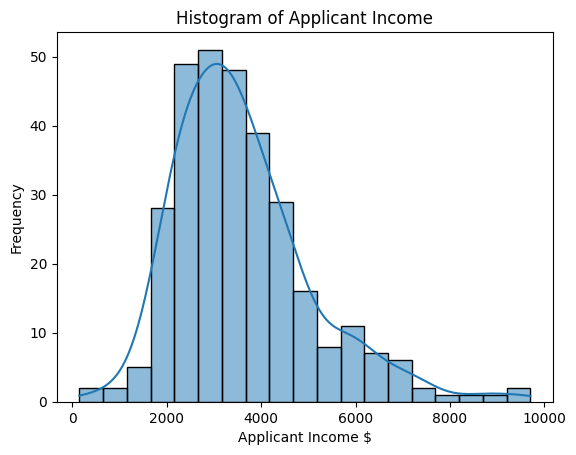

In [10]:
sns.histplot(data['ApplicantIncome'], kde=True)
plt.title('Histogram of Applicant Income')
plt.xlabel('Applicant Income $')
plt.ylabel('Frequency')
plt.show()

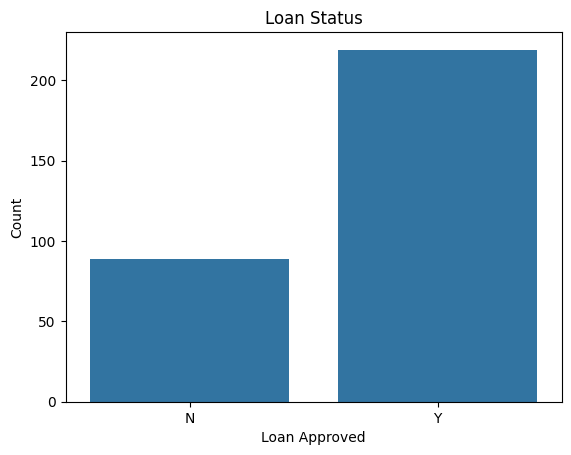

In [11]:
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status')
plt.xlabel('Loan Approved')
plt.ylabel('Count')
plt.show()

In [12]:
data.groupby('Education')['LoanAmount'].mean()

Education
Graduate        105.344978
Not Graduate    102.531646
Name: LoanAmount, dtype: float64

In [13]:
avg_loan_amount_by_ed = data.groupby('Education')['LoanAmount'].mean().reset_index()

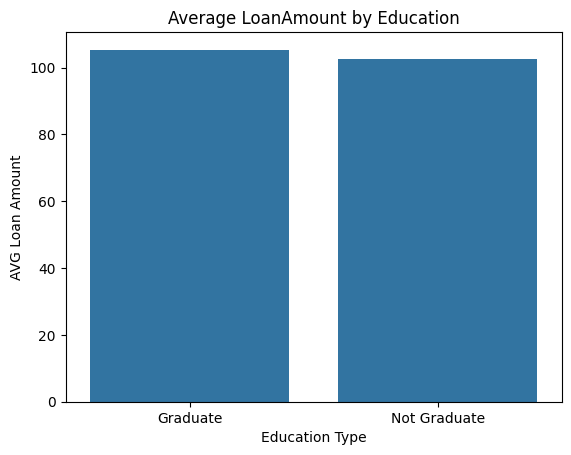

In [14]:
sns.barplot(x='Education', y='LoanAmount', data=avg_loan_amount_by_ed)
plt.title('Average LoanAmount by Education')
plt.xlabel('Education Type')
plt.ylabel("AVG Loan Amount")
plt.show()

In [15]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

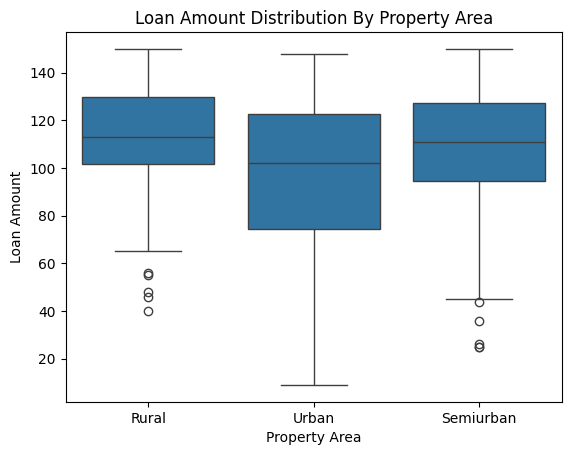

In [16]:
sns.boxplot(x='Property_Area', y='LoanAmount', data=data)
plt.title('Loan Amount Distribution By Property Area')
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.show()

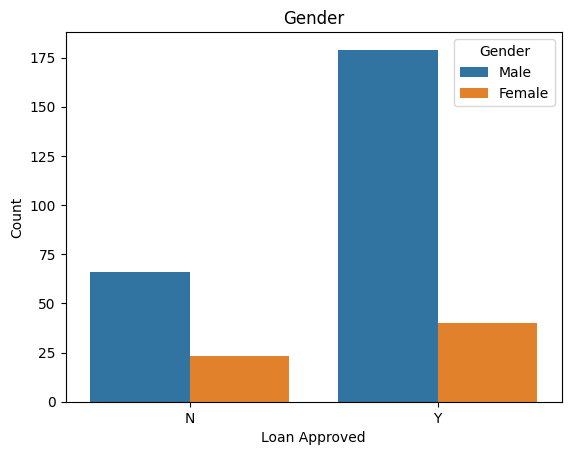

In [17]:
sns.countplot(x= 'Loan_Status', hue='Gender', data=data)
plt.title('Gender')
plt.xlabel('Loan Approved')
plt.ylabel('Count')
plt.show()

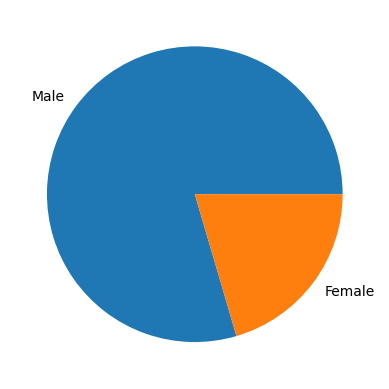

In [18]:
data['Gender'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [19]:
loan_status_by_married = data.groupby('Married')['Loan_Status'].value_counts().unstack()

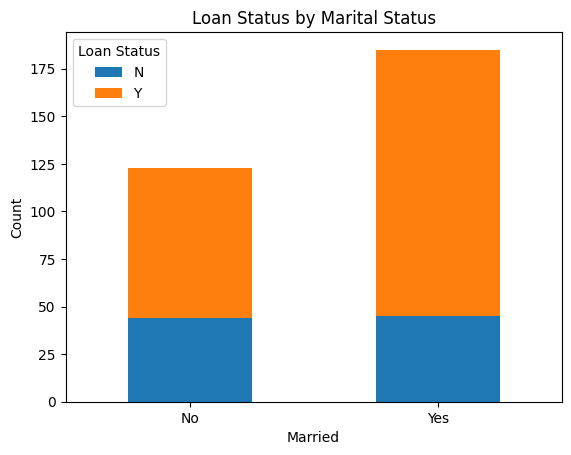

In [20]:
loan_status_by_married.plot(kind='bar', stacked=True)
plt.title('Loan Status by Marital Status')
plt.xlabel('Married')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=0)
plt.show()

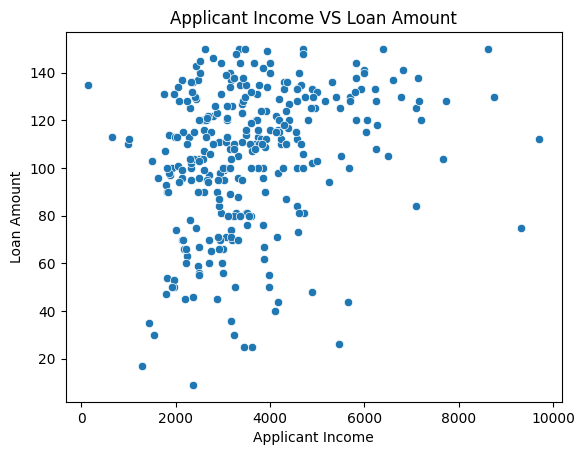

In [21]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=data)
plt.title('Applicant Income VS Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel("Loan Amount")
plt.show()

In [22]:
numeric_data = data.select_dtypes(include=["float64", "int64"])

In [23]:
numeric_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0
...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1.0
377,3232,1950.0,108.0,360.0,1.0
378,2900,0.0,71.0,360.0,1.0
379,4106,0.0,40.0,180.0,1.0


In [24]:
correlation_matrix = numeric_data.corr()

In [25]:
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.243677,0.267628,-0.099571,0.030307
CoapplicantIncome,-0.243677,1.000000,0.123028,-0.004158,0.012715
LoanAmount,0.267628,0.123028,1.000000,0.135069,-0.043853
Loan_Amount_Term,-0.099571,-0.004158,0.135069,1.000000,0.015269
Credit_History,0.030307,0.012715,-0.043853,0.015269,1.000000


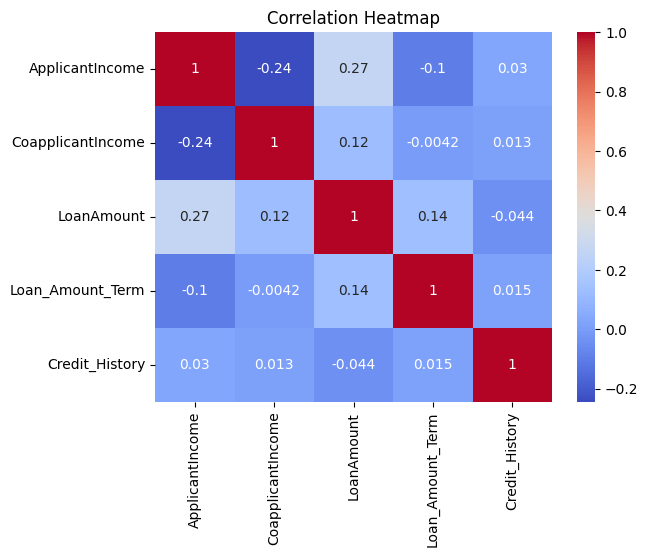

In [26]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [27]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
avg_loan_term_by_employed = data.groupby('Self_Employed')['Loan_Amount_Term'].mean().reset_index()

In [29]:
avg_loan_term_by_employed

,Self_Employed,Loan_Amount_Term
0,No,342.3
1,Yes,330.0


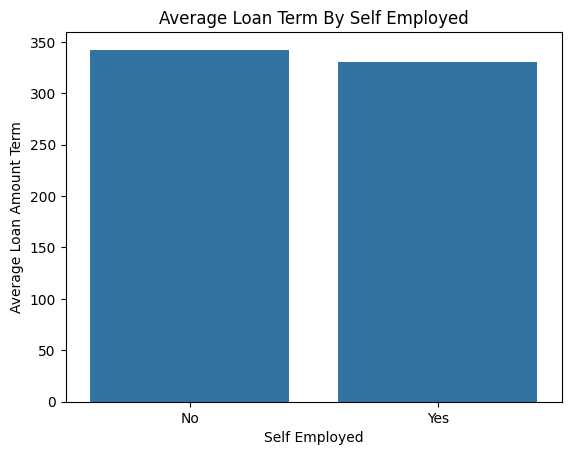

In [30]:
sns.barplot(x="Self_Employed", y ="Loan_Amount_Term", data = avg_loan_term_by_employed)
plt.title('Average Loan Term By Self Employed')
plt.xlabel('Self Employed')
plt.ylabel('Average Loan Amount Term')
plt.show()

In [32]:
data.to_csv("clean_loan_data.csv", index=False)